#### Imports & Credentials

In [1]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

import pandas as pd
import os
import time
import pickle
import nltk

# service = Service(executable_path=ChromeDriverManager().install())

# login credentials
username = "mueller.friedrich@gmail.com"
password = "abcdef"



#### Start the Browser (Chrome in this case) and go to login

In [3]:
### Start the Browser (Chrome in this case)

# initialize/open the Chrome broswer
browser = webdriver.Chrome("chromedriver")

# Go to login site
browser.get("https://app.aleph-alpha.com/login")

time.sleep(1)


### Maneuver the login

# Press buttom "Accept Selected" (with "essential" cookies selected by default) 
for elem in browser.find_elements(By.XPATH, './/span[@class = "mantine-qo1k2 mantine-Button-label"]'):
    if elem.text == "Accept Selected":
        elem.click()

# find username/email field and send the username itself to the input field
browser.find_element(By.ID, "email").send_keys(username)

# find password input field and insert password as well
browser.find_element(By.ID, "password").send_keys(password)

time.sleep(1)

# click login button
for elem in browser.find_elements(By.XPATH, './/span[@class = "mantine-qo1k2 mantine-Button-label"]'):
    print(elem.text)
    if elem.text == "Sign in":
        elem.click()

time.sleep(1)

browser.get("https://app.aleph-alpha.com/playground/completion")

Sign up
Sign in


#### Prepare the data for playground prompts (see german_datasets_titles_texts.csv after execution of cell)

In [ ]:
# Load dataset (from outside of github repo contents)

# pandas.read_csv(r"C:\Users\fjun\Desktop")
df = pd.read_csv("C:\\Users\\fjun\\Desktop\\datasets_merged.csv",  sep=';')
# print(df)

# Concat title and text into one and save text column in new dataframe

# first load the pos tagger
f = open('german_pos_classifier.pickle', 'rb')
pos_clf = pickle.load(f)
f.close()

def title_to_sentence(title, clf):
    tokens = clf.tag(nltk.word_tokenize(title))
    if tokens[-1][1] != '$.':
        return title+'.'
    else:
        return title
    
# get the titles and texts merges
df_new = df['title'].apply(title_to_sentence, clf=pos_clf)+' '+df['text']
df_new['fake'] = df['fake']

# save dataframe
df_new.to_csv('german_datasets_titles_texts.csv', sep=',', index=False)

In [ ]:
# Pick some fake news with twitter post maximal length and
# extract keywords/information from it for prompt generation
df = pd.read_csv("german_datasets_titles_texts.csv",  sep=',')


# print(df)
# print(df['0'])

# df["CharCounts"]=df["0"].apply(lambda x: len(x))
# print(df)
# df=df[(df["CharCounts"]>= 2)&(df["CharCounts"]<=280)]
print(df)


# Pick some non-fake news with twitter post maximal length
# and extract keywords/information from it for fake news
# generation




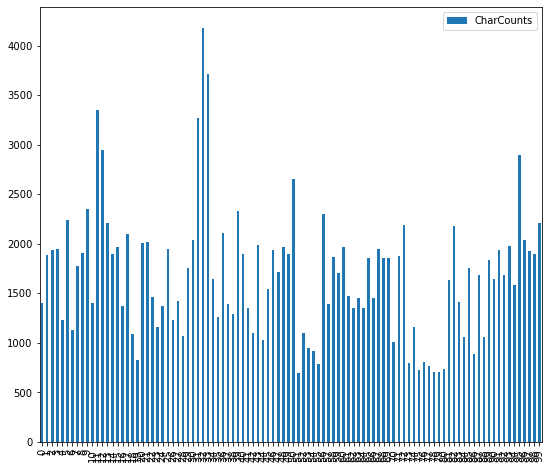

In [7]:
# # take data
# data = pd.read_csv("Bestsellers.csv")
 
# # form dataframe
# data = data.head()
 
# df = pd.DataFrame(data, columns=["Name", "Price", "User Rating"])
import matplotlib.pyplot as mp
# plot the dataframe
# df1 = df
df.head(100).plot(y=["CharCounts"], kind="bar", figsize=(9, 8))
 
# print bar graph
mp.show()